In [80]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [81]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
np.random.seed(0)
plt.style.use("ggplot")

import tensorflow as tf
print('Tensorflow version:', tf.__version__)

Tensorflow version: 2.1.0


In [82]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.optimizers import Adam

import tensorflow.keras.utils as ku 
import numpy as np

In [83]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt \
    -O /tmp/sonnets.txt
text = open('/tmp/sonnets.txt').read()

--2020-05-11 10:48:04--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.142.128, 2607:f8b0:400e:c08::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.142.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 93578 (91K) [text/plain]
Saving to: ‘/tmp/sonnets.txt’

/tmp/sonnets.txt    100%[===================>]  91.38K  --.-KB/s    in 0.001s  

2020-05-11 10:48:04 (60.2 MB/s) - ‘/tmp/sonnets.txt’ saved [93578/93578]



In [84]:
# text

# Splitting the text into lines-->


In [85]:
data= text.lower().split("\n")
# data1

# Tokenizing the Text-->

In [86]:
tokenizer = Tokenizer()

In [87]:
tokenizer.fit_on_texts(data)
tot_words=len(tokenizer.word_index)+1
tot_words

3211

In [151]:
# tokenizer.word_index.items()

# So there are 3211 words in the data..

In [88]:
sequences=[]

In [147]:
for l in data:
    token = tokenizer.texts_to_sequences([l])
#     print(token)
#     print(token[:4]) 
    for i in range(1,len(token)):
      ngrams_seq=token[:i+1]
      sequences.append(ngrams_seq)

In [149]:
# sequences

# So we had know converted the texts to sequences..

In [91]:
max=0
for i in sequences:
    h=len(i)
    if(h>max):
        max=h

In [92]:
max

11

# So the maximum length among the sequrnces is 11,so this will be our max-padding..

In [93]:
data1= pad_sequences(sequences, maxlen=max)
data1

array([[   0,    0,    0, ...,    0,   34,  417],
       [   0,    0,    0, ...,   34,  417,  877],
       [   0,    0,    0, ...,  417,  877,  166],
       ...,
       [   0,    0,    0, ...,  493,  493, 3210],
       [   0,    0,    0, ...,  493, 3210,   15],
       [   0,    0,    0, ..., 3210,   15,   14]], dtype=int32)

# Now we have pre-padded the sequences

In [94]:
tot_words

3211

In [95]:
data1.dtype

dtype('int32')

In [96]:
data1.shape

(15462, 11)

# SPLITTING PREDICTORS AND LABELS-->

Taking the last word of every sequence as target variable and rest all as the independent variables..So that our neural network will learn accordingly..
So in labels we will be selecting the last column..

In [97]:
predictors=data1[:,:-1]
predictors

array([[   0,    0,    0, ...,    0,    0,   34],
       [   0,    0,    0, ...,    0,   34,  417],
       [   0,    0,    0, ...,   34,  417,  877],
       ...,
       [   0,    0,    0, ..., 3209,  493,  493],
       [   0,    0,    0, ...,  493,  493, 3210],
       [   0,    0,    0, ...,  493, 3210,   15]], dtype=int32)

In [98]:
predictors.shape

(15462, 10)

In [123]:
# pred=predictors[0:500]
# pred.shape

# Selecting the Last Column-->

In [100]:
labels=data1[:,-1]
labels

array([ 417,  877,  166, ..., 3210,   15,   14], dtype=int32)

In [101]:
labels.shape

(15462,)

# Changing labels to categorical..

In [104]:
labels=ku.to_categorical(labels,num_classes=tot_words)
labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [152]:
labels.shape

(15462, 3211)

# Creating the Model-->

In [105]:
model = Sequential()
model.add(Embedding(input_dim=tot_words,output_dim=90,input_length=10))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(units=200,return_sequences=True)))
model.add(Dropout(0.3))
model.add(Bidirectional(LSTM(units=100)))
model.add(Dense(tot_words,activation='softmax'))

In [106]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 10, 90)            288990    
_________________________________________________________________
dropout_10 (Dropout)         (None, 10, 90)            0         
_________________________________________________________________
bidirectional_10 (Bidirectio (None, 10, 400)           465600    
_________________________________________________________________
dropout_11 (Dropout)         (None, 10, 400)           0         
_________________________________________________________________
bidirectional_11 (Bidirectio (None, 200)               400800    
_________________________________________________________________
dense_5 (Dense)              (None, 3211)              645411    
Total params: 1,800,801
Trainable params: 1,800,801
Non-trainable params: 0
____________________________________________

In [107]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [108]:
 history = model.fit(predictors, labels, epochs=100, verbose=1)

Train on 15462 samples
Epoch 1/100
15462/15462 [==============================] - 13s 834us/sample - loss: 6.8731 - accuracy: 0.0244
Epoch 2/100
15462/15462 [==============================] - 8s 496us/sample - loss: 6.4742 - accuracy: 0.0272
Epoch 3/100
15462/15462 [==============================] - 7s 474us/sample - loss: 6.3621 - accuracy: 0.0330
Epoch 4/100
15462/15462 [==============================] - 8s 489us/sample - loss: 6.2765 - accuracy: 0.0359
Epoch 5/100
15462/15462 [==============================] - 7s 483us/sample - loss: 6.1815 - accuracy: 0.0406
Epoch 6/100
15462/15462 [==============================] - 7s 464us/sample - loss: 6.0790 - accuracy: 0.0454
Epoch 7/100
15462/15462 [==============================] - 7s 473us/sample - loss: 5.9642 - accuracy: 0.0517
Epoch 8/100
15462/15462 [==============================] - 8s 487us/sample - loss: 5.8424 - accuracy: 0.0568
Epoch 9/100
15462/15462 [==============================] - 8s 492us/sample - loss: 5.7158 - accuracy: 0.

15462/15462 [==============================] - 7s 469us/sample - loss: 1.3069 - accuracy: 0.6828
Epoch 76/100
15462/15462 [==============================] - 7s 477us/sample - loss: 1.2803 - accuracy: 0.6880
Epoch 77/100
15462/15462 [==============================] - 8s 489us/sample - loss: 1.2659 - accuracy: 0.6912
Epoch 78/100
15462/15462 [==============================] - 7s 471us/sample - loss: 1.2401 - accuracy: 0.6990
Epoch 79/100
15462/15462 [==============================] - 7s 467us/sample - loss: 1.2239 - accuracy: 0.7038
Epoch 80/100
15462/15462 [==============================] - 7s 475us/sample - loss: 1.1983 - accuracy: 0.7073
Epoch 81/100
15462/15462 [==============================] - 9s 553us/sample - loss: 1.1830 - accuracy: 0.7150
Epoch 82/100
15462/15462 [==============================] - 7s 474us/sample - loss: 1.1643 - accuracy: 0.7173
Epoch 83/100
15462/15462 [==============================] - 7s 476us/sample - loss: 1.1384 - accuracy: 0.7251
Epoch 84/100
15462/1546

# Accuracy reached to 77%..

Text(0.5, 1.0, 'Training accuracy')

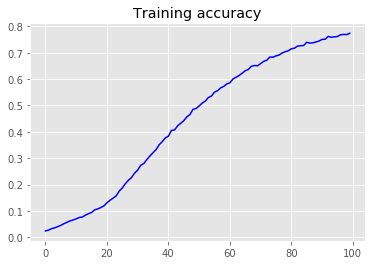

In [110]:
accuracy = history.history['accuracy']

epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'b', label='Training accuracy')
plt.title('Training accuracy')

Text(0.5, 1.0, 'Training accuracy')

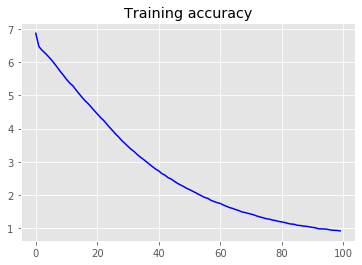

In [111]:
loss = history.history['loss']
epochs = range(len(loss))

plt.plot(epochs, loss, 'b', label='Training accuracy')
plt.title('Training accuracy')

# Predicting-->

In [125]:
output_word = ""

In [135]:
test_text = "Help me Obi Wan Kenobi, you're my only hope"
next_words = 100

for num in range(next_words):
	token = tokenizer.texts_to_sequences([test_text])
	new_pad = pad_sequences(token, maxlen=10)
	predicted = model.predict_classes(new_pad, verbose=0)
	
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	test_text += " " + output_word

In [136]:
print(test_text)

Help me Obi Wan Kenobi, you're my only hope of sight did there can see his skill be say still character will be not fled ' know thee me in me faults find proof hence saucy end hath face be matter had date up in rolling truth 'will ' are her wish see ' best best thee faults saucy skill ' ' are ' ' have her old part single unkindness content spent fill of this ' have thee art be gone hate ' see so times more bright that said all me saucy skill objects faults find bright do thine own eye more bright more fair of me


In [138]:
new1="Good night, good night! Parting is such sweet sorrow, That I shall say good night till it be morrow"

In [140]:
next_words = 100

for num in range(next_words):
	token = tokenizer.texts_to_sequences([new1])
	new_pad = pad_sequences(token, maxlen=10)
	predicted = model.predict_classes(new_pad, verbose=0)
	
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	new1 += " " + output_word

In [141]:
print(new1)

Good night, good night! Parting is such sweet sorrow, That I shall say good night till it be morrow gone flattery thee doth none belied thee grave see this ill ' do not thee faults still thee tongue or ill ' ' ' you best lies her ' bring ' ' ' ' ' you know is bad away unkindness force world's cupid ' ' find it see it best look dost so fortune's times sweet nor new ' best thee in me muse pass'd her prove remembrance goest dearly ' see me blind thee this say this exceed say forfeit write single me more near black sight decay riper ' not see before the winds razed 'will' more


In [143]:
new2="All the world's a stage And all the men and women merely players They have their exits and their entrances And one man in his time plays many parts His acts being seven ages. At first, the infant, Mewling and puking in the nurses arms"

In [144]:
next_words = 100

for num in range(next_words):
	token = tokenizer.texts_to_sequences([new2])
	new_pad = pad_sequences(token, maxlen=10)
	predicted = model.predict_classes(new_pad, verbose=0)
	
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	new2 += " " + output_word

In [146]:
print(new2)

All the world's a stage And all the men and women merely players They have their exits and their entrances And one man in his time plays many parts His acts being seven ages. At first, the infant, Mewling and puking in the nurses arms year night bail ' deem thee it was look this ill ' ' ' see me alack on thee men lives voice fickle 'will' and slow ' have you have still another skill all ill ' ' know ' are black as all men's proves blood flattery not ' swear on me this ' ' hast thee remembrance of me this others' friend razed ' not see his trim 'will' more strong ' do variation can see it lovest you see it fortune's 'will' more ' not ' ' ' not ' is unjust ' ' ' ' ' '
